# Determination of a promising tariff for a telecom company

The customer is a federal mobile operator. Customers are offered two tariff plans. It is necessary to determine which tariff brings in more money in order to adjust the advertising budget. The task is to analyze the behavior of customers and conclude which tariff is better.

## Data Preparation and Exploration

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [322]:
# We read the provided data and give them names.
users = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_03/users.csv')
calls = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_03/calls.csv')
internet = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_03/internet.csv')
messages = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_03/messages.csv')
tariffs = pd.read_csv('/Users/vintera/Git/my_projects/dataset/project_03/tariffs.csv')

In [323]:
users
users.info()
users.age.describe()
users.tariff.value_counts()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

smart    351
ultra    149
Name: tariff, dtype: int64

In [324]:
calls
calls.info()
calls.duration.describe()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [325]:
messages
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [326]:
internet
internet.info()
internet.mb_used.describe()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [327]:
tariffs
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [328]:
# In order not to pile up the general table, we will transfer information about tariffs to directories and, if necessary, we will use them.
dict_smart = {
    "messages_included": 50, 
    "gb_per_month_included": 15, 
    "minutes_included": 500,
    "rub_monthly_fee": 550,
    "rub_per_gb": 200,
    "rub_per_message": 3,
    "rub_per_minute": 3
} 
dict_ultra = {
    "messages_included": 1000, 
    "gb_per_month_included": 30, 
    "minutes_included": 3000,
    "rub_monthly_fee": 1950,
    "rub_per_gb": 150,
    "rub_per_message": 1,
    "rub_per_minute": 1
} 

### Summary

For the study, five tables containing data on 500 unique users, the number and date of calls made, text messages sent and Internet usage, as well as information about two tarfin plans are provided. Upon first acquaintance, the data does not cause additional questions - all the available omissions are logically explicable, there are no abnormal values. However, in our situation, it will be more comfortable to work with one data frame than with several.

## Data preprocessing and research

### Grouping data and merging tables

In [329]:
# In all tables that have information about dates, we will put these columns in the appropriate format.
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [330]:
# # In the tables with information about calls, messages and traffic from the date of use of the service, we will select a month and create a separate column for each table.
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [331]:
calls = calls.query('duration > 0')

#### Comment
Despite the fact that the data on calls lasting 0 seconds, although they give us a small idea of the subscriber's activity, one of the main tasks of the study remains the study of the amounts spent by subscribers on communication services, and since "empty" calls do not affect the final cost in any way, but only pull the average and median value down, let's get rid of such calls.

<AxesSubplot: >

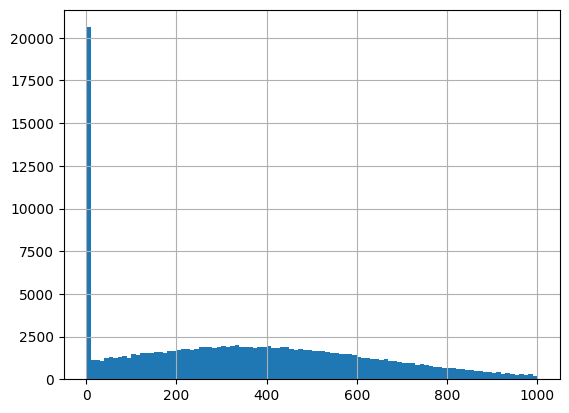

In [332]:
internet['mb_used'].hist(bins=100, range=(0, 1000), grid=True)

In [333]:
internet.query('mb_used == 0').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19598 entries, 11 to 149393
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    19598 non-null  int64         
 1   id            19598 non-null  object        
 2   mb_used       19598 non-null  float64       
 3   session_date  19598 non-null  datetime64[ns]
 4   user_id       19598 non-null  int64         
 5   month         19598 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [334]:
internet = internet.query('mb_used > 0')

#### Comment
When checking Internet traffic data, 19598 values equal to 0 were detected. What zero sessions mean is anyone's guess, since it is not possible to contact the data collectors. It can be assumed that this is how sessions with outgoing traffic are designated. In any case, such data will not affect the total cost of the service for a month, so you can get rid of zero values.

In [335]:
# Data on the duration of calls will be rounded up, based on the rules of the operator.
calls['duration'] = np.ceil(calls['duration'])

In [336]:
# Information about calls will be grouped by users and months, the total number of minutes will be summed up by months.
grouped_calls = calls.groupby(['user_id', 'month']).agg({'duration': ['sum', 'count']}).reset_index()
grouped_calls.columns = ['user_id', 'month', 'cons_minutes', 'num_of_cal']

In [337]:
# Group the data about the sent messages by users and months, we will get the number of messages by counting the dates of sending.
grouped_sms = messages.groupby(['user_id', 'month']).agg({'message_date': 'count'}).reset_index()
grouped_sms.columns = ['user_id', 'month', 'cons_sms']

In [338]:
grouped_internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
grouped_internet['mb_used'] = (grouped_internet['mb_used'] / 1024).apply(np.ceil)
grouped_internet.columns = ['user_id', 'month', 'cons_traffic_gb']

#### Comment
Information about the traffic consumed will also be grouped by users and months, the total amount of traffic will be summarized by months. Convert the values into gigabytes, dividing them by 1024 and according to the Customer's rules, round the values up.

In [339]:
# In the table with tariffs, we convert megabytes to gigabytes. And slightly edit the column names.
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
tariffs.columns = ['sms_incl', 'gb_incl', 'min_incl', 'subscript_fee', 'rub_per_gb', 'rub_per_sms', 'rub_per_min', 'tariff']

In [340]:
# We connect the tables grouped earlier by the .merge method, linking them to each other by users and months. We assign the name data to the resulting table.

cal_sms = grouped_calls.merge(grouped_sms, on=('user_id', 'month'), how='outer')
# calls + messages
cal_sms_int = cal_sms.merge(grouped_internet, on=('user_id', 'month'), how='outer')
# calls + messages + internet
data = users.merge(cal_sms_int, on= 'user_id', how='outer')
# users + calls + messages + internet

### Working with passes

In [341]:
# Delete two lines with subscribers who did not use the operator's services.
data.query('month.isna()')
data.dropna(subset=['month'], inplace=True)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,cons_minutes,num_of_cal,cons_sms,cons_traffic_gb
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,NaN,NaN,NaN,NaN,NaN
2335,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,NaN,NaN,NaN,NaN,NaN


In [342]:
# It can be assumed that omissions in the columns containing information about the number of minutes spent, messages and Internet traffic imply that the subscriber did not use these services. 
# Replace them with 0.
data['cons_minutes'] = data['cons_minutes'].fillna(0)
data['num_of_cal'] = data['num_of_cal'].fillna(0)
data['cons_sms'] = data['cons_sms'].fillna(0)
data['cons_traffic_gb'] = data['cons_traffic_gb'].fillna(0)

### Подсчет и добавление новых данных

In [343]:
# # Let's create a function for calculating the cost of calls over the tariff package. 
# We will add the results of the calculation to a new column.

def min_overlmt_fee(row):
    tariff = row['tariff']
    minutes = row['cons_minutes']
    
    if 'ultra' in tariff:
        if minutes <= dict_ultra["minutes_included"]:
            return 0
        return minutes - dict_ultra["minutes_included"]
    else:
        if minutes <= dict_smart["minutes_included"]:
            return 0
        return (minutes - dict_smart["minutes_included"]) * 3

data['min_overlimit_fee'] = data.apply(min_overlmt_fee, axis=1)

In [344]:
def sms_overlmt_fee(row):
    tariff = row['tariff']
    sms = row['cons_sms']
    
    if 'ultra' in tariff:
        if sms <= dict_ultra["messages_included"]:
            return 0
        return sms - dict_ultra["messages_included"]
    else:
        if sms <= dict_smart["messages_included"]:
            return 0
        return (sms - dict_smart["messages_included"]) * 3

data['sms_overlimit_fee'] = data.apply(sms_overlmt_fee, axis=1)

In [345]:
def gb_overlmt_fee(row):
    tariff = row['tariff']
    gb = row['cons_traffic_gb']
    
    if 'ultra' in tariff:
        if gb <= dict_ultra["gb_per_month_included"]:
            return 0
        return (gb - dict_ultra["gb_per_month_included"]) * 150
    else:
        if gb <= dict_smart["gb_per_month_included"]:
            return 0
        return (gb - dict_smart["gb_per_month_included"]) * 200

data['gb_overlimit_fee'] = data.apply(gb_overlmt_fee, axis=1)

In [346]:
data['total_overlimit_fee'] = data['min_overlimit_fee'] + data['sms_overlimit_fee'] + data['gb_overlimit_fee']

#### Comment
For data on messages and Internet traffic, we use a similar function and add columns with the amount of overpayment to the table. Creating a column with the total amount of overpayment for all three services.

In [347]:
def total_fee(row):
    tariff = row['tariff']
    over_limit_fee = row['total_overlimit_fee']
    
    if 'ultra' in tariff:
        return over_limit_fee + dict_ultra["rub_monthly_fee"] # subscription fee according to the ultra tariff
    return over_limit_fee + dict_smart["rub_monthly_fee"] # smart subscription fee

data['total_fee'] = data.apply(total_fee, axis=1)

#### Comment
Using a similar function, we will calculate the full amount of funds spent by the subscriber on communication services for the current month.

### Data type conversion

In [348]:
# Assign a numeric data type to the columns with information about the month, the number of minutes spent, messages and Internet traffic.
data = data.astype({'month': int, 
                    'cons_minutes': int, 
                    'num_of_cal': int, 
                    'cons_sms': int, 
                    'cons_traffic_gb': int, 
                    'min_overlimit_fee': int, 
                    'sms_overlimit_fee': int, 
                    'gb_overlimit_fee': int, 
                    'total_overlimit_fee': int, 
                    'total_fee': int})

In [349]:
data
data.info()
data.describe()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,cons_minutes,num_of_cal,cons_sms,cons_traffic_gb,min_overlimit_fee,sms_overlimit_fee,gb_overlimit_fee,total_overlimit_fee,total_fee
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,159,17,22,3,0,0,0,0,1950
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,172,28,60,23,0,0,0,0,1950
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,340,41,75,14,0,0,0,0,1950
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,408,42,81,14,0,0,0,0,1950
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,466,46,57,15,0,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,247,30,42,21,0,0,1200,1200,1750
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,70,8,11,2,0,0,0,0,550
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,449,44,48,18,0,0,600,600,1150
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,612,62,59,18,336,27,600,963,1513


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3215
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              3214 non-null   int64         
 1   age                  3214 non-null   int64         
 2   churn_date           187 non-null    datetime64[ns]
 3   city                 3214 non-null   object        
 4   first_name           3214 non-null   object        
 5   last_name            3214 non-null   object        
 6   reg_date             3214 non-null   datetime64[ns]
 7   tariff               3214 non-null   object        
 8   month                3214 non-null   int64         
 9   cons_minutes         3214 non-null   int64         
 10  num_of_cal           3214 non-null   int64         
 11  cons_sms             3214 non-null   int64         
 12  cons_traffic_gb      3214 non-null   int64         
 13  min_overlimit_fee    3214 non-nul

,user_id,age,month,cons_minutes,num_of_cal,cons_sms,cons_traffic_gb,min_overlimit_fee,sms_overlimit_fee,gb_overlimit_fee,total_overlimit_fee,total_fee
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,46.641568,8.317362,451.244866,50.713752,38.281269,17.299004,86.564095,12.067206,451.384568,550.015868,1529.076229
std,144.659172,16.586109,2.905413,241.909978,26.951413,36.148326,7.400584,219.231515,34.526748,684.137633,767.771509,798.251091
min,1000.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1125.000000,32.000000,6.000000,282.000000,32.000000,9.000000,13.000000,0.000000,0.000000,0.000000,0.000000,750.000000
50%,1253.000000,46.000000,9.000000,443.000000,50.000000,30.000000,17.000000,0.000000,0.000000,0.000000,163.500000,1653.500000
75%,1378.750000,62.000000,11.000000,589.000000,66.000000,57.000000,21.000000,0.000000,0.000000,800.000000,938.000000,1950.000000
max,1499.000000,75.000000,12.000000,1673.000000,190.000000,224.000000,49.000000,2805.000000,279.000000,4600.000000,6220.000000,6770.000000


### Summary

In this section, information about the use of services was grouped by month and user IDs, then the data obtained from four tables were combined by these columns. The resulting gaps indicating non-use of the service were replaced with 0. Two users whose information is not of interest were deleted. The calculation of the overpayment for the use of services in excess of the tariff package was made. As a result, a table consisting of 18 columns and 3214 rows containing the data necessary for further analysis was obtained.

## Exploratory Data Analysis

In [350]:
smart = data.query('tariff == "smart"')
ultra = data.query('tariff == "ultra"')

### Duration of conversations

Data on the duration of calls of subscribers with the "Smart" tariff
_____________________________________________________________________


count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: cons_minutes, dtype: float64

The variance is equal to: 36219.31578434428


Data on the duration of calls of subscribers with the "Ultra" tariff
_____________________________________________________________________


count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: cons_minutes, dtype: float64

The variance is equal to: 100873.63339730098


<AxesSubplot: title={'center': 'Duration of conversations'}, ylabel='Frequency'>

Text(0.5, 0, 'Duration of conversations (min.)')

Text(0, 0.5, 'Total number')

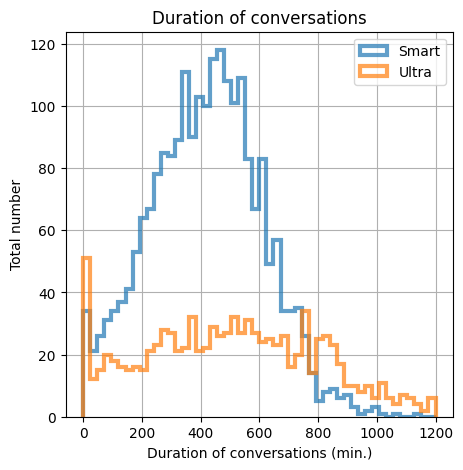

In [351]:
print('Data on the duration of calls of subscribers with the "Smart" tariff')
print('_____________________________________________________________________')
smart['cons_minutes'].describe() # mean and standard deviation
print('The variance is equal to:', smart['cons_minutes'].var()) # variance
print('')
print('')
print('Data on the duration of calls of subscribers with the "Ultra" tariff')
print('_____________________________________________________________________')
ultra['cons_minutes'].describe() # mean and standard deviation
print('The variance is equal to:', ultra['cons_minutes'].var()) # variance

ax = smart.plot(
    kind='hist', y='cons_minutes', histtype='step', range=(0, 1200), bins=50, 
    linewidth=3, alpha=0.7, label='Smart', figsize = (5,5), title='Duration of conversations')
ultra.plot(
    kind='hist', y='cons_minutes', histtype='step',range=(0, 1200), bins=50,
    linewidth=3, alpha=0.7, label='Ultra', ax=ax, grid=True, legend=True)
plt.xlabel('Duration of conversations (min.)')
plt.ylabel('Total number')

#### Summary
The average and median values for tarfi are very close to 418 and 422 for users with the Smart tariff, 526 and 517 for Ultra, which indicates that there are no greatly overestimated or underestimated values in the data. Despite the fact that there is twice as much data on the Smart tariff, the standard deviation is 190, and Ultra has 318, which is explained by the wide variety of data in this tariff. The variance of "Smart" is 36219, "Ultra" is 100874. After analyzing the resulting histogram, it can be concluded that the data in the "Ultra" tariff is distributed almost evenly, without peak values - subscribers spend from 50 to 900 minutes almost the same. The main part of Smart subscribers on average speaks for a month from 100 to 700 minutes. Both tariffs have a part of the values equal to 0, which indicates that the service is not used during certain months or by certain subscribers (someone uses the Internet exclusively).

### Number of messages sent

Data on the number of messages sent by subscribers with the "Smart" tariff
___________________________________________________________________________


count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: cons_sms, dtype: float64

The variance is equal to: 796.8129584480083


Data on the number of messages sent by subscribers with the "Ultra" tariff
___________________________________________________________________________


count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: cons_sms, dtype: float64

The variance is equal to: 2285.266142544674


<AxesSubplot: title={'center': 'Number of messages sent'}, ylabel='Frequency'>

Text(0.5, 0, 'Number of messages (per month)')

Text(0, 0.5, 'Total number')

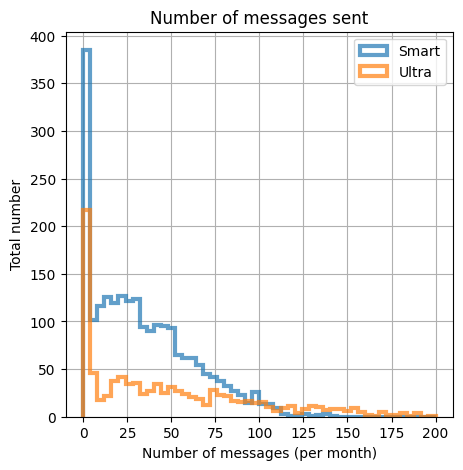

In [352]:
print('Data on the number of messages sent by subscribers with the "Smart" tariff')
print('___________________________________________________________________________')
smart['cons_sms'].describe() # mean and standard deviation
print('The variance is equal to:', smart['cons_sms'].var()) # variance
print('')
print('')
print('Data on the number of messages sent by subscribers with the "Ultra" tariff')
print('___________________________________________________________________________')
ultra['cons_sms'].describe() # mean and standard deviation
print('The variance is equal to:', ultra['cons_sms'].var()) # variance

ax = smart.plot(
    kind='hist', y='cons_sms', histtype='step', range=(0, 200), bins=50, 
    linewidth=3, alpha=0.7, label='Smart', figsize = (5,5), title='Number of messages sent')
ultra.plot(
    kind='hist', y='cons_sms', histtype='step',range=(0, 200), bins=50,
    linewidth=3, alpha=0.7, label='Ultra', ax=ax, grid=True, legend=True)
plt.xlabel('Number of messages (per month)')
plt.ylabel('Total number')

#### Summary
The average and median "Smart" - 33 and 28, "Ultra" - 49 and 38 messages, respectively. The variance of "Smart" is 797, the standard deviation is 28, "Ultra" is 2285 and 48, respectively. When analyzing the histogram, attention is attracted by a large number of zero values, which is logical, the service of sending text messages is being replaced by Internet messengers. The data in the "Ultra" tariff is distributed evenly, has no peaks (with the exception of 0), their main part fits into indicators from 20 to 120, Smart subscribers send mainly from 10 to 70 messages per month.

### Used up internet traffic

Data on the traffic consumed by subscribers with the "Smart" tariff
__________________________________________________________________


count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: cons_traffic_gb, dtype: float64

The variance is equal to: 33.02870517811161


Data on traffic consumed by subscribers with the "Ultra" tariff
__________________________________________________________________


count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: cons_traffic_gb, dtype: float64

The variance is equal to: 97.09168626965459


<AxesSubplot: title={'center': 'The amount of Internet traffic consumed'}, ylabel='Frequency'>

Text(0.5, 0, 'Internet traffic volume (GB)')

Text(0, 0.5, 'Total number')

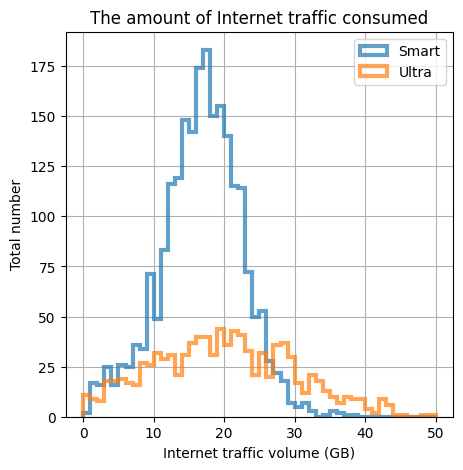

In [353]:
print('Data on the traffic consumed by subscribers with the "Smart" tariff')
print('__________________________________________________________________')
smart['cons_traffic_gb'].describe() # mean and standard deviation
print('The variance is equal to:', smart['cons_traffic_gb'].var()) # variance
print('')
print('')
print('Data on traffic consumed by subscribers with the "Ultra" tariff')
print('__________________________________________________________________')
ultra['cons_traffic_gb'].describe() # mean and standard deviation
print('The variance is equal to:', ultra['cons_traffic_gb'].var()) # variance

ax = smart.plot(
    kind='hist', y='cons_traffic_gb', histtype='step', range=(0, 50), bins=50, 
    linewidth=3, alpha=0.7, label='Smart', figsize = (5,5), title='The amount of Internet traffic consumed')
ultra.plot(
    kind='hist', y='cons_traffic_gb', histtype='step',range=(0, 50), bins=50,
    linewidth=3, alpha=0.7, label='Ultra', ax=ax, grid=True, legend=True)
plt.xlabel('Internet traffic volume (GB)')
plt.ylabel('Total number')

#### Summary
The average and median "Smart" - 16 and 17, "Ultra" - the same value of 19 gigabytes. These values are identical to each other due to the correct distribution of data and the absence of outliers. The variance of "Smart" is 33, the standard deviation is 6, and "Ultra" is 97 and 10, respectively. The almost complete absence of zero values indicates that everyone uses the Internet nowadays. Smart users mainly spend from 10 to 25 GB of traffic per month, in Ultra, the data is distributed almost evenly along the axis, as always, the users of this tariff mainly spend from 10 to 30 GB.

### Summary

In this section, the indicators of the use of basic services by users of the "Smart" and "Ultra" tariffs for the month were studied. Smart subscribers are almost twice as many as Ultra subscribers, but at the same time, the latter talk and send more messages, however, in the matter of using the Internet, subscribers remain solidary and spend almost the same amount of traffic. Considering that a large number of Smart subscribers do not fit into the tariff limits, and the fee for services over the package is quite high, it can be assumed that on average they spend more per month than Ultra subscribers.

## Hypothesis testing

### Hypothesis 1: "The average revenue of users of the Ultra and Smart tariffs differs."

h₀ - The average revenue of users of the "Ultra" and "Smart" tariffs is the same.

h₁ - The average revenue of users of the "Ultra" and "Smart" tariffs differs.

In [354]:
smart_total_fee = smart['total_fee']
ultra_total_fee = ultra['total_fee']

In [355]:
smart_total_fee

8       1150
9        550
10       550
11      1150
12      1550
        ... 
3211    1750
3212     550
3213    1150
3214    1513
3215     598
Name: total_fee, Length: 2229, dtype: int64

In [356]:
alpha = 0.05 # standard critical level of statistical significance
results = st.ttest_ind(smart_total_fee, ultra_total_fee, equal_var=True)

print('average revenue with the "Smart" tariff: {:.0f}'.format(smart_total_fee.mean()))
print('average revenue with the "Ultra" tariff: {:.0f}'.format(ultra_total_fee.mean()))
print()
print('p-value: {}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

average revenue with the "Smart" tariff: 1290
average revenue with the "Ultra" tariff: 2070

p-value: 1.4229814360764067e-160

Reject the null hypothesis


the p-value is significantly less than the critical level of statistical significance, which tells us about the inequality of the two aggregates, and therefore we reject the null hypothesis. The average revenue of users of the "Ultra" and "Smart" tariffs differs.

### Hypothesis 2: "The average revenue of users from Moscow differs from the revenue of users from other regions."

h₀ - The average revenue of users from Moscow does not differ from the revenue of users from other regions.

h₁ - The average revenue of users from Moscow differs from the revenue of users from other regions.

In [357]:
moscow_total_fee = data.query('city == "Москва"')['total_fee']
region_total_fee = data.query('city != "Москва"')['total_fee']

In [358]:
alpha = 0.05 # standard critical level of statistical significance
results = st.ttest_ind(moscow_total_fee, region_total_fee, equal_var=True)

print('average revenue of users from Moscow: {:.0f}'.format(moscow_total_fee.mean()))
print('average revenue of users from other regions: {:.0f}'.format(region_total_fee.mean()))
print()
print('p-value: {:.10f}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

average revenue of users from Moscow: 1547
average revenue of users from other regions: 1525

p-value: 0.5440152912

Failed to reject the null hypothesis


the p-value is greater than the critical level of statistical significance, which tells us about the equality of the two aggregates, and therefore it is impossible to refute the null hypothesis. The average revenue of users from Moscow does not differ from the revenue of users from other regions.

### Hypothesis 3: "The average duration of conversations between users of the Ultra and Smart tariffs does not differ."

h₀ - The average duration of conversations for users of the "Ultra" and "Smart" tariffs does not differ.

h₁ - The average duration of conversations for users of the "Ultra" and "Smart" tariffs differs.

In [359]:
smart_cons_minutes = smart['cons_minutes']
ultra_cons_minutes = ultra['cons_minutes']

In [360]:
alpha = 0.05 # standard critical level of statistical significance
results = st.ttest_ind(smart_cons_minutes, ultra_cons_minutes, equal_var=True)

print('average duration of conversations in the "Smart" tariff: {:.0f}'.format(smart_cons_minutes.mean()))
print('average duration of conversations in the "Ultra" tariff: {:.0f}'.format(ultra_cons_minutes.mean()))
print()
print('p-value: {:.10f}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

average duration of conversations in the "Smart" tariff: 418
average duration of conversations in the "Ultra" tariff: 527

p-value: 0.0000000000

Reject the null hypothesis


the p-value is significantly less than the critical level of statistical significance, which tells us about the inequality of the two aggregates, and therefore we reject the null hypothesis. The average duration of conversations for users of the "Ultra" and "Smart" tariffs varies.

### Summary

Let's check the hypotheses put forward, we can conclude that they pay about the same for communication services throughout the country, subscribers with the "Ultra" tariff pay a little less for communication than subscribers with the "Smart" tariff.

## General Conclusion and Recommendations

As a result of the conducted research, the behavior of subscribers of two different tariff plans was studied, it was established how much money they spend monthly on communication services, which communication services are more in demand, and which are less. Summing up, we can draw the following conclusions: 
1. Ultra users, on average, talk more on the phone, send messages and use the Internet than Smart users, but at the same time they spend about 20% of the minutes of conversation, 5% of messages and 65% of Internet traffic included in the main tariff plan.
2. Subscribers with the Smart tariff plan mainly use the services in accordance with the basic package provided, the exception is Internet traffic, for which subscribers slightly overpay over the tariff package.
3. Considering that the monthly subscription fee for the Smart tariff is 3.5 times lower than the subscription fee for Ultra, and as we have learned, Smart subscribers generally do not overpay over the tariff package, the total amount of funds they spend per month on communication services is 60% of the subscribers' spending with "Ultra".

It is impossible to unequivocally answer the main question of the study, which of the presented tariffs is better, since "Ultra", although it seems more profitable, but do not forget that the study was conducted based on data from a small period of time. It can be assumed that some subscribers with the "Ultra" tariff plan, realizing that they do not spend even half of the services included in the package, will prefer alternative options with a lower subscription fee and a package of services.
Based on the results of a study of the behavior of Smart users, it can be assumed that these subscribers try not to cross the limits set by the basic package of services, since the fee for using services over the package is high. Despite this, they are still more likely to use such a popular service as mobile Internet, in excess of the established limit. By the reverse analogy with Ultra users, it can be assumed that this group of subscribers can be attracted by a tariff package with increased basic limits for services.
Based on the above, taking into account the pros and cons of the tariffs under study, we can answer the main question - the best tariff could be the "Medium" tariff, which includes the average rates of the "Ultra" and "Smart" tariffs.
    
Regarding general observations and trends, the following can be distinguished:
1. The most popular service is mobile Internet.
2. Subscribers practically do not use the service of sending text messages.
3. Communication costs are relatively equal across the country.